# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [37]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [38]:
# A)
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [50]:
# Reproduzindo a Regressão de gorjetas explicada pelo valor conta liquido
regression_model = smf.ols(formula='tip ~ net_bill', data=tips).fit()
regression_model.summary()
#R-squared 0.33

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           5.02e-23
Time:                        21:19:40   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

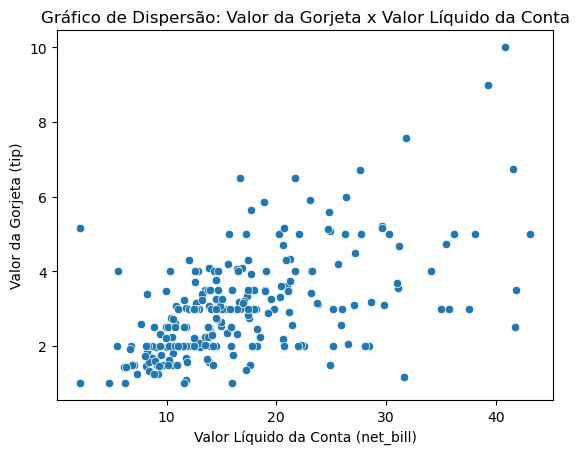

In [51]:
# B)

# Reproduzindo o gráfico de dispersão entre Gorjeta e Valor liquido conta
sns.scatterplot(x='net_bill', y='tip', data=tips)
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Valor da Gorjeta (tip)')
plt.title('Gráfico de Dispersão: Valor da Gorjeta x Valor Líquido da Conta')
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [52]:
# Ajustando o modelo de regressão de tip_pct por net_bill
regression_model2 = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()
regression_model2.summary()
#R-squared: 0.091

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.52e-06
Time:                        21:19:54   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Cris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


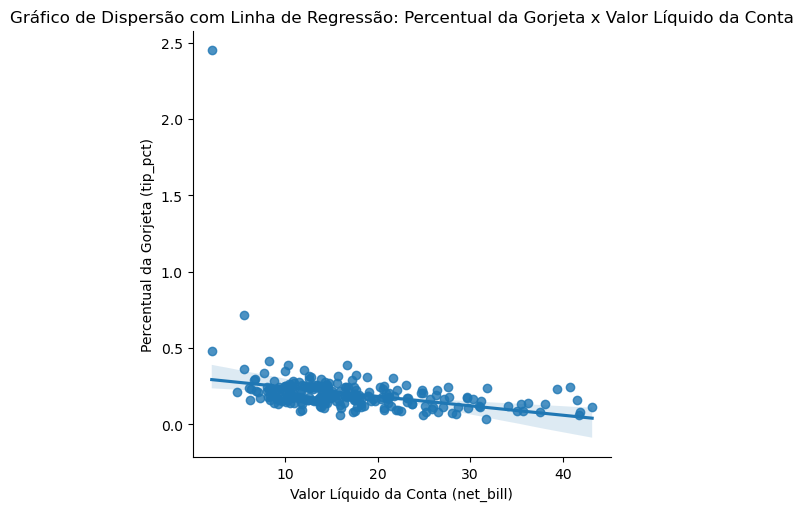

In [53]:
# Gráfico de dispersão com linha de regressão
sns.lmplot(x='net_bill', y='tip_pct', data=tips)
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Percentual da Gorjeta (tip_pct)')
plt.title('Gráfico de Dispersão com Linha de Regressão: Percentual da Gorjeta x Valor Líquido da Conta')
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

*
No primeiro gráfico conseguimos visualizar a correlação entre a gorjeta e o valor da conta, assim como a dispersão dos dados.

*
No segundo gráfico atráves da linha de regressão, conseguimos visualizar a tendencia do percentual da gorjeta em relação ao valor líquido da conta.

*
Sobre comparar diretamente os 𝑅2s, acredito que não é apropriado porque no primeiro modelo a variavel é o valor absoluto da gorjeta e no outro o percentual da gorjeta.


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [54]:
# 1) Obtendo o valor predito para tip_pct
tip_pct_pred = regression_model.fittedvalues

In [55]:
# 2) Obtendo o valor predito para tip
tip_pred = tip_pct_pred * tips['net_bill']

In [56]:
# 3) Calculando R² do Modelo para tip
r_tip = regression_model.rsquared
r_tip

0.3325407312323706

In [57]:
# 4) Comparando o novo R² com o do item 1.
r_tip_pct = regression_model2.rsquared

print(f"R² modelo item 1 (tip ~ net_bill):{r_tip:.4f}")
print(f"R² modelo item 4 (tip_pct ~ net_bill): {r_tip_pct:.4f}")

R² modelo item 1 (tip ~ net_bill):0.3325
R² modelo item 4 (tip_pct ~ net_bill): 0.0913


* Conforme o resultado dos R² acima, o modelo 1 melhor se ajusta aos dados do que o modelo 2.